# Data Analysis on Pyber rides
----
## Conclusion


> Data analysis was performed on ride data set (city_data.csv, ride_data.csv) and following observations were made:

----
![rideDetail](Images/rideDetail.png)

### Trend 1:
Company should definitely focus on Rural areas. They have less number of rides there probably due to less number of drivers.


----
### Trend 2:
If you see the graph there is some overlap in number of rides per city data between suburban and rural areas. 
However there are more number of drivers in suburban areas compared to rural area. 
This means company needs to do more marketing towards consumers in suburban areas.


----
### Trend 3:
People are clearly ready to pay more money for the ride in rural areas. 
There is a big difference in average price paid per city among different cities in rural areas.
Company should consider changing their pricing model to attract more riders. 



----
## Tasks completed:
Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.


---
## changelog
* 13-Feb-2018 




In [1182]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1183]:
# Read CSV
city= pd.read_csv('city_data.csv', encoding = "ISO-8859-1")
# Read CSV
ride= pd.read_csv('ride_data.csv', encoding = "ISO-8859-1")


In [1184]:
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [1185]:
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [1186]:
#checking duplicate in ride data

#len(ride)
#2375
#len(ride['ride_id'].unique())
#2375

In [1187]:
#checking duplicate in city data

#len(city)
#126
len(city['city'].unique())
#125
# It seems one duplicate or bad data

125

In [1188]:
#Finding duplicate 
dup_series = city['city'].duplicated(keep='first')
city[dup_series]

,city,driver_count,type
100,Port James,3,Suburban


In [1189]:
#querying duplicate 

city.loc[(city['city'] == 'Port James')]

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [1190]:
# deleting duplicates (if we want to )
#city.set_index("city" , inplace=True)
#city.drop(['Port James'], axis=0 , inplace=True)
#city.reset_index(inplace=True)

# We probably need to sum that up
agg_dict_x = { 'driver_count': ['sum'] ,'type': [ 'max' ] }
df_group_type = city.groupby(['city'])
city_fix = df_group_type.agg(agg_dict_x)
city_fix.columns = ["_".join(x) for x in city_fix.columns.ravel()]
city_fix.rename(columns={'driver_count_sum' : 'driver_count' ,'type_max' : 'type' },inplace=True)
city_fix.reset_index(inplace=True)
city_fix.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [1191]:
# Checking data (city) if its there in ride but not in city 
x = pd.merge(ride,city_fix,on = 'city', how='left')
x = x.loc[(x['type'].isnull())]
x

,city,date,fare,ride_id,driver_count,type


In [1192]:
#merging all the data in denormalized form

ride_complete = pd.merge(city_fix,ride,on = 'city')

ride_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [1193]:
#agg by City Type --driver count
agg_dict_x = { 'driver_count': [ 'sum' ]  }
df_group_type = city_fix.groupby(['type'])
pctDriversPerCityType = df_group_type.agg(agg_dict_x)
pctDriversPerCityType.columns = ["_".join(x) for x in pctDriversPerCityType.columns.ravel()]
pctDriversPerCityType.rename(columns={'driver_count_sum' : 'TotalDrivers' },inplace=True)

pctDriversPerCityType.reset_index(inplace=True)
df_type_color=pctDriversPerCityType['type']
pctDriversPerCityType.set_index("type" , inplace=True)

pctDriversPerCityType.head()






,TotalDrivers
type,
Rural,104
Suburban,638
Urban,2607


In [1194]:
#Setting up colors orders 
#gold (#dbb40c)
#sky blue (#75bbfd)
#coral (#fc5a50)
#purple(#7e1e9c)
#green(#15b01a)
#blue(#0343df)
#pink(#ff81c0) 
#brown(#653700)
    
color_dict_template = {0 : '#fc5a50' ,1 : '#75bbfd' ,2 : '#dbb40c' ,
                       3 : '#653700' ,
                       4 : '#ff81c0' ,
                       5 : '#0343df'  }

color_dict1 = df_type_color.to_dict()
color_dict2 = dict(map(reversed, color_dict1.items()))
for x, y in color_dict2.items():
    color_dict2[x] =  color_dict_template[y]
color_dict2['Rural']

color_dict2.values()

dict_values(['#fc5a50', '#75bbfd', '#dbb40c'])

In [1195]:
#agg by City Type
agg_dict_x = { 'fare': [ 'sum' ] ,'ride_id': [ 'count' ] }
df_group_type = ride_complete.groupby(['type'])
pctXPerCityType = df_group_type.agg(agg_dict_x)
pctXPerCityType.columns = ["_".join(x) for x in pctXPerCityType.columns.ravel()]
pctXPerCityType.rename(columns={'fare_sum' : 'TotalFare','ride_id_count' : 'TotalRides' },inplace=True)
#pctXPerCityType.reset_index(inplace=True)
pctXPerCityType.head()

,TotalFare,TotalRides
type,,
Rural,4255.09,125
Suburban,19317.88,625
Urban,40078.34,1625


In [1196]:
# agg by city count combined
pctXPerCityType.reset_index(inplace=True)
pctDriversPerCityType.reset_index(inplace=True)

pctXPerCityType = pctXPerCityType.merge(pctDriversPerCityType , on ='type')

pctXPerCityType.set_index("type" , inplace=True)

pctXPerCityType.head()

,TotalFare,TotalRides,TotalDrivers
type,,,
Rural,4255.09,125,104
Suburban,19317.88,625,638
Urban,40078.34,1625,2607


In [1197]:
# creating function to create graph so we can reuse the code 
# Intentionally set shadow=False for clearity
def my_pie_graph(label_column,data_column,v_title):
    # This function will return pie chart

    plotdf = pctXPerCityType.sort_values([data_column] , ascending=False)
    plotdf = plotdf.reset_index()
    plotdf['myexplode'] = plotdf.index/20
    plotdf.set_index(label_column , inplace=True)

    plotdf_explode = plotdf['myexplode']
    plotdf_data = plotdf[data_column]
    plot1 = plotdf_data.plot(kind="pie", 
                             figsize=(5,5),
                             autopct="%1.1f%%",
                             shadow=False, 
                             legend=False, 
                             label='',
                             colors= color_dict2.values(),
                             startangle=230, 
                             explode= plotdf_explode)

    plt.title(v_title)
    plt.axis("equal")
    plt.show()



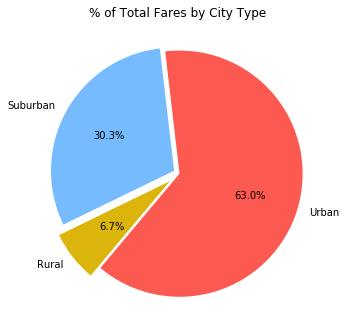

In [1198]:
# pie chart for % of Total Fares by City Type
label_column = 'type'
data_column = 'TotalFare'
v_title ="% of Total Fares by City Type"+chr(10)
my_pie_graph(label_column,data_column,v_title)

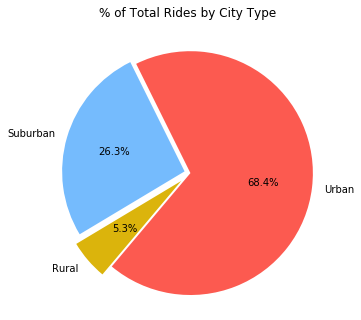

In [1199]:
# pie chart for % of Total Rides by City Type
label_column = 'type'
data_column = 'TotalRides'
v_title ="% of Total Rides by City Type"+chr(10)
my_pie_graph(label_column,data_column,v_title)

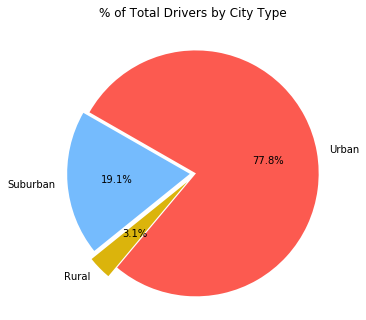

In [1200]:
# pie chart for % of Total Drivers by City Type
label_column = 'type'
data_column = 'TotalDrivers'
v_title ="% of Total Drivers by City Type"+chr(10)
my_pie_graph(label_column,data_column,v_title)

In [1201]:
#Relationship

agg_dict_x = { 'fare': ['mean'] ,'ride_id': [ 'count' ] }
df_group_type = ride_complete.groupby(['city','driver_count','type'])
AverageFarePerCity = df_group_type.agg(agg_dict_x)
AverageFarePerCity.columns = ["_".join(x) for x in AverageFarePerCity.columns.ravel()]
AverageFarePerCity.rename(columns={'fare_mean' : 'AverageFare' ,'ride_id_count' : 'TotalRides' },inplace=True)
AverageFarePerCity.reset_index(inplace=True)
AverageFarePerCity.head()



,city,driver_count,type,AverageFare,TotalRides
0,Alvarezhaven,21,Urban,23.928710,31
1,Alyssaberg,67,Urban,20.609615,26
2,Anitamouth,16,Suburban,37.315556,9
3,Antoniomouth,21,Urban,23.625000,22
4,Aprilchester,49,Urban,21.981579,19


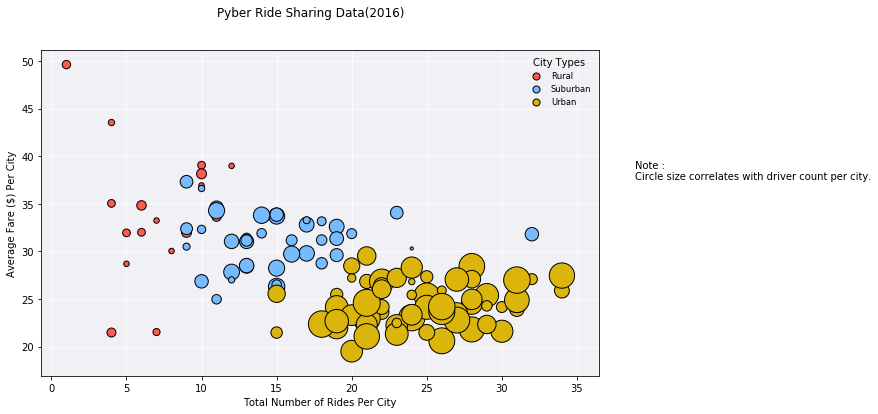

In [1202]:
#scatter graph with 4 variables
#Average Fare ($) Per City y
#Total Number of Rides Per City x
#Total Number of Drivers Per City bubble size
#City Type (Urban, Suburban, Rural) legend

v_title ="Pyber Ride Sharing Data(2016)"
v_x_label ="Total Number of Rides Per City"
v_y_label ="Average Fare ($) Per City"
v_legend_title = 'City Types'
v_fig_note = 'Note :'+chr(10)+'Circle size correlates with driver count per city.'

fig, ax1 = plt.subplots(figsize=(10, 6))

for my_graph_category in pctDriversPerCityType['type'].values:
    df_scatter = AverageFarePerCity.loc[( AverageFarePerCity['type'] == my_graph_category) ,:]
    v_x_axis= 'TotalRides'
    v_y_axis= 'AverageFare'
    v_size = df_scatter['driver_count']*10
    color_string =color_dict2[my_graph_category]
    x1, = df_scatter.plot(kind="scatter"
                          , x=v_x_axis
                          , y=v_y_axis
                          , s=v_size
                          , label = my_graph_category
                          , grid=True
                          ,color = color_string
                          , edgecolors="black"
                          ,subplots=True
                          , legend = True 
                          , ax=ax1 
                           )
  
lgnd = plt.legend(title =v_legend_title 
                  , fontsize="small"
                  , fancybox=False
                  ,loc="best"
                  ,facecolor  = 'inherit'
                  , framealpha=0
                  ,edgecolor  = 'inherit'
           )  

for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])

ax1.set_xlabel(v_x_label)
ax1.set_ylabel(v_y_label)
ax1.set_facecolor('#f0f0f5')
ax1.set_axisbelow(True)
ax1.grid(color='white')
fig.suptitle(v_title)
plt.figtext(.95, 0.60, v_fig_note, verticalalignment='center',horizontalalignment='left')
plt.show()
